In [109]:
import requests as req
import json
import operator
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
font_name = "simhei"
plt.rcParams['font.family']=font_name
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box
plt.rcParams['figure.dpi'] = 200


_actors = {'201':{'Factor_id':'201','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252941.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252945.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253945.jpg','Factor_name':'周震南','Factor_desc':''},'202':{'Factor_id':'202','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252943.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252947.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253946.jpg','Factor_name':'牛超','Factor_desc':''},'203':{'Factor_id':'203','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252948.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252949.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253947.jpg','Factor_name':'王晨艺','Factor_desc':''},'204':{'Factor_id':'204','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252952.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252953.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253948.jpg','Factor_name':'张远','Factor_desc':''},'205':{'Factor_id':'205','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252955.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252956.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253950.jpg','Factor_name':'高嘉朗','Factor_desc':''},'206':{'Factor_id':'206','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252958.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252959.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253951.jpg','Factor_name':'赵政豪','Factor_desc':''},'207':{'Factor_id':'207','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252962.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252963.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253953.jpg','Factor_name':'焉栩嘉','Factor_desc':''},'208':{'Factor_id':'208','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252966.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252967.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253954.jpg','Factor_name':'赵让','Factor_desc':''},'209':{'Factor_id':'209','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252970.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252971.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253955.jpg','Factor_name':'刘也','Factor_desc':''},'210':{'Factor_id':'210','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252973.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1252974.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253956.jpg','Factor_name':'陆思恒','Factor_desc':''},'211':{'Factor_id':'211','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253941.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253942.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253944.jpg','Factor_name':'夏之光','Factor_desc':''},'212':{'Factor_id':'212','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253957.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253959.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253961.jpg','Factor_name':'何洛洛','Factor_desc':''},'213':{'Factor_id':'213','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253962.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253963.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253965.jpg','Factor_name':'赵磊','Factor_desc':''},'214':{'Factor_id':'214','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253966.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253967.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253969.jpg','Factor_name':'张颜齐','Factor_desc':''},'215':{'Factor_id':'215','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253970.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253971.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253973.jpg','Factor_name':'翟潇闻','Factor_desc':''},'216':{'Factor_id':'216','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253974.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253975.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253977.jpg','Factor_name':'彭楚粤','Factor_desc':''},'217':{'Factor_id':'217','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253978.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253979.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253981.jpg','Factor_name':'贺俊雄','Factor_desc':''},'218':{'Factor_id':'218','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253982.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254259.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253983.jpg','Factor_name':'吴季峰','Factor_desc':''},'219':{'Factor_id':'219','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253985.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253986.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253988.jpg','Factor_name':'李昀锐','Factor_desc':''},'220':{'Factor_id':'220','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253989.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253990.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253992.jpg','Factor_name':'周兆渊','Factor_desc':''},'221':{'Factor_id':'221','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253993.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253994.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253996.jpg','Factor_name':'李鑫一','Factor_desc':''},'222':{'Factor_id':'222','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253997.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1253998.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254000.jpg','Factor_name':'戴景耀','Factor_desc':''},'223':{'Factor_id':'223','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254002.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254003.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254005.jpg','Factor_name':'任豪','Factor_desc':''},'224':{'Factor_id':'224','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254006.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254007.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254009.jpg','Factor_name':'余承恩','Factor_desc':''},'225':{'Factor_id':'225','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254010.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254011.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254012.jpg','Factor_name':'丰楚轩','Factor_desc':''},'226':{'Factor_id':'226','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254013.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254014.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254016.jpg','Factor_name':'林子杰','Factor_desc':''},'227':{'Factor_id':'227','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254017.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254018.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254020.jpg','Factor_name':'马雪阳','Factor_desc':''},'228':{'Factor_id':'228','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254021.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254023.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254022.jpg','Factor_name':'熊艺文','Factor_desc':''},'229':{'Factor_id':'229','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254024.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254025.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254027.jpg','Factor_name':'白洪滔','Factor_desc':''},'230':{'Factor_id':'230','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254028.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254029.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254031.jpg','Factor_name':'秦天','Factor_desc':''},'231':{'Factor_id':'231','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254032.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254033.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254036.jpg','Factor_name':'张炯敏','Factor_desc':''},'232':{'Factor_id':'232','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254034.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254037.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254039.jpg','Factor_name':'朱微之','Factor_desc':''},'233':{'Factor_id':'233','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254040.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254041.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254043.jpg','Factor_name':'孙圻峻','Factor_desc':''},'234':{'Factor_id':'234','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254045.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254046.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254048.jpg','Factor_name':'任世豪','Factor_desc':''},'235':{'Factor_id':'235','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254049.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254050.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254052.jpg','Factor_name':'林染','Factor_desc':''},'236':{'Factor_id':'236','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254053.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254054.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254056.jpg','Factor_name':'张达源','Factor_desc':''},'237':{'Factor_id':'237','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254057.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254059.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254061.jpg','Factor_name':'郭珈睿','Factor_desc':''},'238':{'Factor_id':'238','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254062.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254063.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254065.jpg','Factor_name':'姚琛','Factor_desc':''},'239':{'Factor_id':'239','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254066.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254067.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254069.jpg','Factor_name':'代少冬','Factor_desc':''},'240':{'Factor_id':'240','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254070.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254071.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254073.jpg','Factor_name':'四正','Factor_desc':''},'241':{'Factor_id':'241','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254074.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254075.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254077.jpg','Factor_name':'董向科','Factor_desc':''},'242':{'Factor_id':'242','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254078.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_chuangzaoying_actorShow/1254964.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_chuangzaoying_actorShow/1254966.jpg','Factor_name':'赵泽帆','Factor_desc':''},'243':{'Factor_id':'243','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254079.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254080.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254082.jpg','Factor_name':'肖凯中','Factor_desc':''},'244':{'Factor_id':'244','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254083.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254084.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254086.jpg','Factor_name':'俞彬','Factor_desc':''},'245':{'Factor_id':'245','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254087.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254088.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254090.jpg','Factor_name':'王艺衡','Factor_desc':''},'246':{'Factor_id':'246','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254091.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254092.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254094.jpg','Factor_name':'胡浩帆','Factor_desc':''},'247':{'Factor_id':'247','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254095.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254096.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254098.jpg','Factor_name':'林亚冬','Factor_desc':''},'248':{'Factor_id':'248','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254099.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254100.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254102.jpg','Factor_name':'蒋熠铭','Factor_desc':''},'249':{'Factor_id':'249','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254103.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254104.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254106.jpg','Factor_name':'易言','Factor_desc':''},'250':{'Factor_id':'250','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254107.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254110.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254108.jpg','Factor_name':'毕皓然','Factor_desc':''},'251':{'Factor_id':'251','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254111.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254112.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254114.jpg','Factor_name':'蔡正杰','Factor_desc':''},'252':{'Factor_id':'252','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254115.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254116.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254118.jpg','Factor_name':'杜煜','Factor_desc':''},'253':{'Factor_id':'253','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254119.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254120.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254122.jpg','Factor_name':'乔君武','Factor_desc':''},'254':{'Factor_id':'254','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254123.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254124.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254126.jpg','Factor_name':'崔绍阳','Factor_desc':''},'255':{'Factor_id':'255','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254127.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254128.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254130.jpg','Factor_name':'段浩男','Factor_desc':''},'256':{'Factor_id':'256','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254160.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254161.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254163.jpg','Factor_name':'在铭','Factor_desc':''},'257':{'Factor_id':'257','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254139.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254140.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254142.jpg','Factor_name':'杨淘','Factor_desc':''},'258':{'Factor_id':'258','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254131.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254132.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254134.jpg','Factor_name':'刘特','Factor_desc':''},'259':{'Factor_id':'259','Factor_img':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254143.png','Factor_img_circle':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254144.jpg','Factor_img_all':'https://y.gtimg.cn/music/common/upload/t_create101_actorShow/1254146.jpg','Factor_name':'王志文','Factor_desc':''}}
_songs = {"201":{"Fsong_id":"201","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258038.mp3","Fsong_name":"Beat Me If You Can"},"202":{"Fsong_id":"202","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258039.mp3","Fsong_name":"敢"},"203":{"Fsong_id":"203","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258041.mp3","Fsong_name":"给一个很爱的人"},"204":{"Fsong_id":"204","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258042.mp3","Fsong_name":"蜕变"},"205":{"Fsong_id":"205","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258043.mp3","Fsong_name":"宣言"},"206":{"Fsong_id":"206","Fsong_href":"http://dldir1.qq.com/music/release/upload/t_mm_file_publish/1258047.mp3","Fsong_name":"国王"}}

In [54]:
#build song and actor index
_actor_index = {}
_song_index = {}

for i in _actors:
    _actor_index[_actors[i]['Factor_name']] = i

for i in _songs:
    _song_index[_songs[i]['Fsong_name']] = i

def get_rankings():
    r = req.get(r'https://c.y.qq.com/share/fcgi-bin/vote/fcg_czy_query.fcg?g_tk=5381&uin=0&format=json&inCharset=utf-8&outCharset=utf-8&notice=0&platform=h5&needNewCode=1&no=1078&source=qqmusic&imei=&_=1556955367415')
    d = eval(r.content)
    
    
    rankings = {}
    total_rankings = {}
    
    for sname in _song_index:
        temp_rankings = {}
        for actor in _actor_index:
            
            try:
                temp_rankings[actor] = d['result'][_song_index[sname] + _actor_index[actor]]
            except:
                temp_rankings[actor] = 999
                
            try:
                total_rankings[d['result'][_song_index[sname] + _actor_index[actor]]] = (actor, sname)
            except:
                total_rankings[999] = (actor, sname)
            
        temp_rankings = OrderedDict(sorted(temp_rankings.items(),key=operator.itemgetter(1)))
        temp_rankings = dict(zip(temp_rankings.keys(),list(range(1,1+len(temp_rankings)))))
        rankings[sname] = temp_rankings
    
    return rankings, total_rankings

def get_ranking_song(rankings, sname):
    return rankings[sname]

def get_ranking_actor(rankings, aname):
    ranking_actor = {}
    
    for song in rankings:
        ranking_actor[song] = rankings[song][aname]

    return ranking_actor

rankings, total_rankings = get_rankings()
# get_ranking_song(rankings,'蜕变')
# get_ranking_actor(rankings,'焉栩嘉')

pd.DataFrame(rankings)

ivers_rankings = {i : {v: k for k, v in rankings[i].items()} for i in rankings}
pd.DataFrame(ivers_rankings)

totals = pd.Series(total_rankings).sort_index()
totals

In [113]:
def plot(df, name):
    plt.tight_layout()
    # set fig size
    fig, ax = plt.subplots() 
    # no axes
    ax.xaxis.set_visible(False)  
    ax.yaxis.set_visible(False)  
    # no frame
    ax.set_frame_on(False)  
    # plot table
    tab = table(ax, df, loc='upper right')  
    # set font manually
    tab.auto_set_font_size(False)
    tab.set_fontsize(8) 
    # save the result
    plt.savefig( name+'.png', dpi=199,bbox_inches="tight")

C:\MANUAL\APPLICATIONS\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1200x800 with 0 Axes>

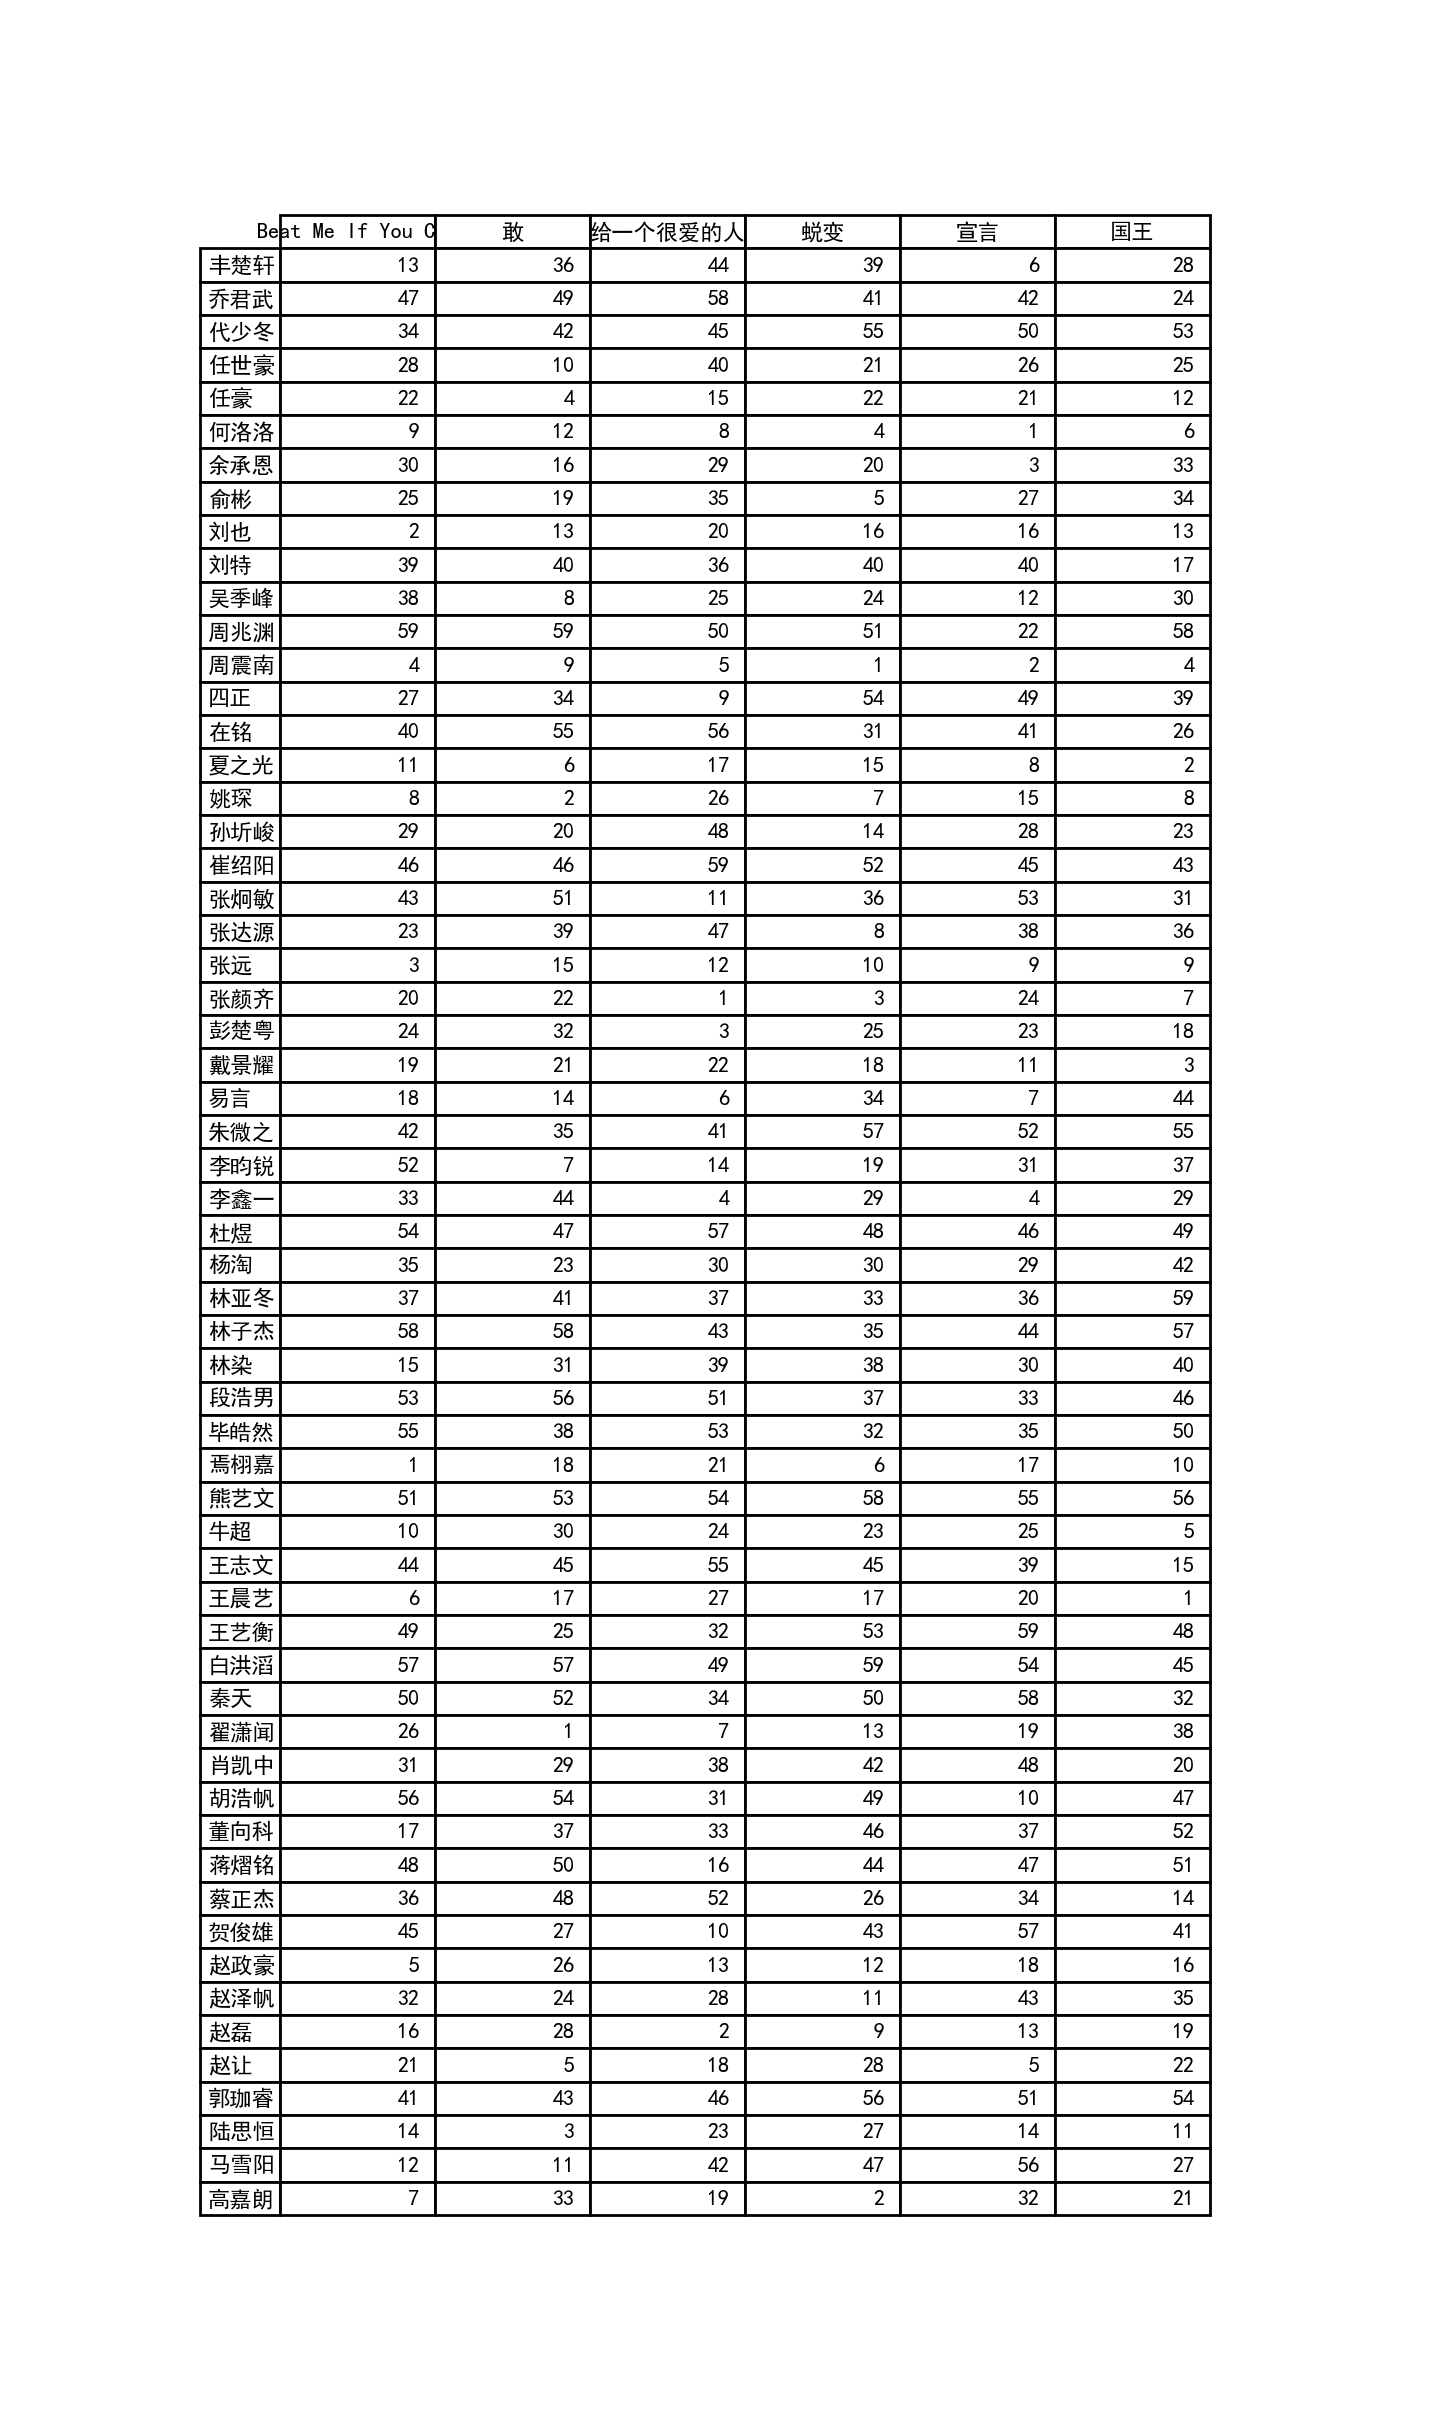

In [114]:
plot(pd.DataFrame(rankings),'rankings')

C:\MANUAL\APPLICATIONS\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1200x800 with 0 Axes>

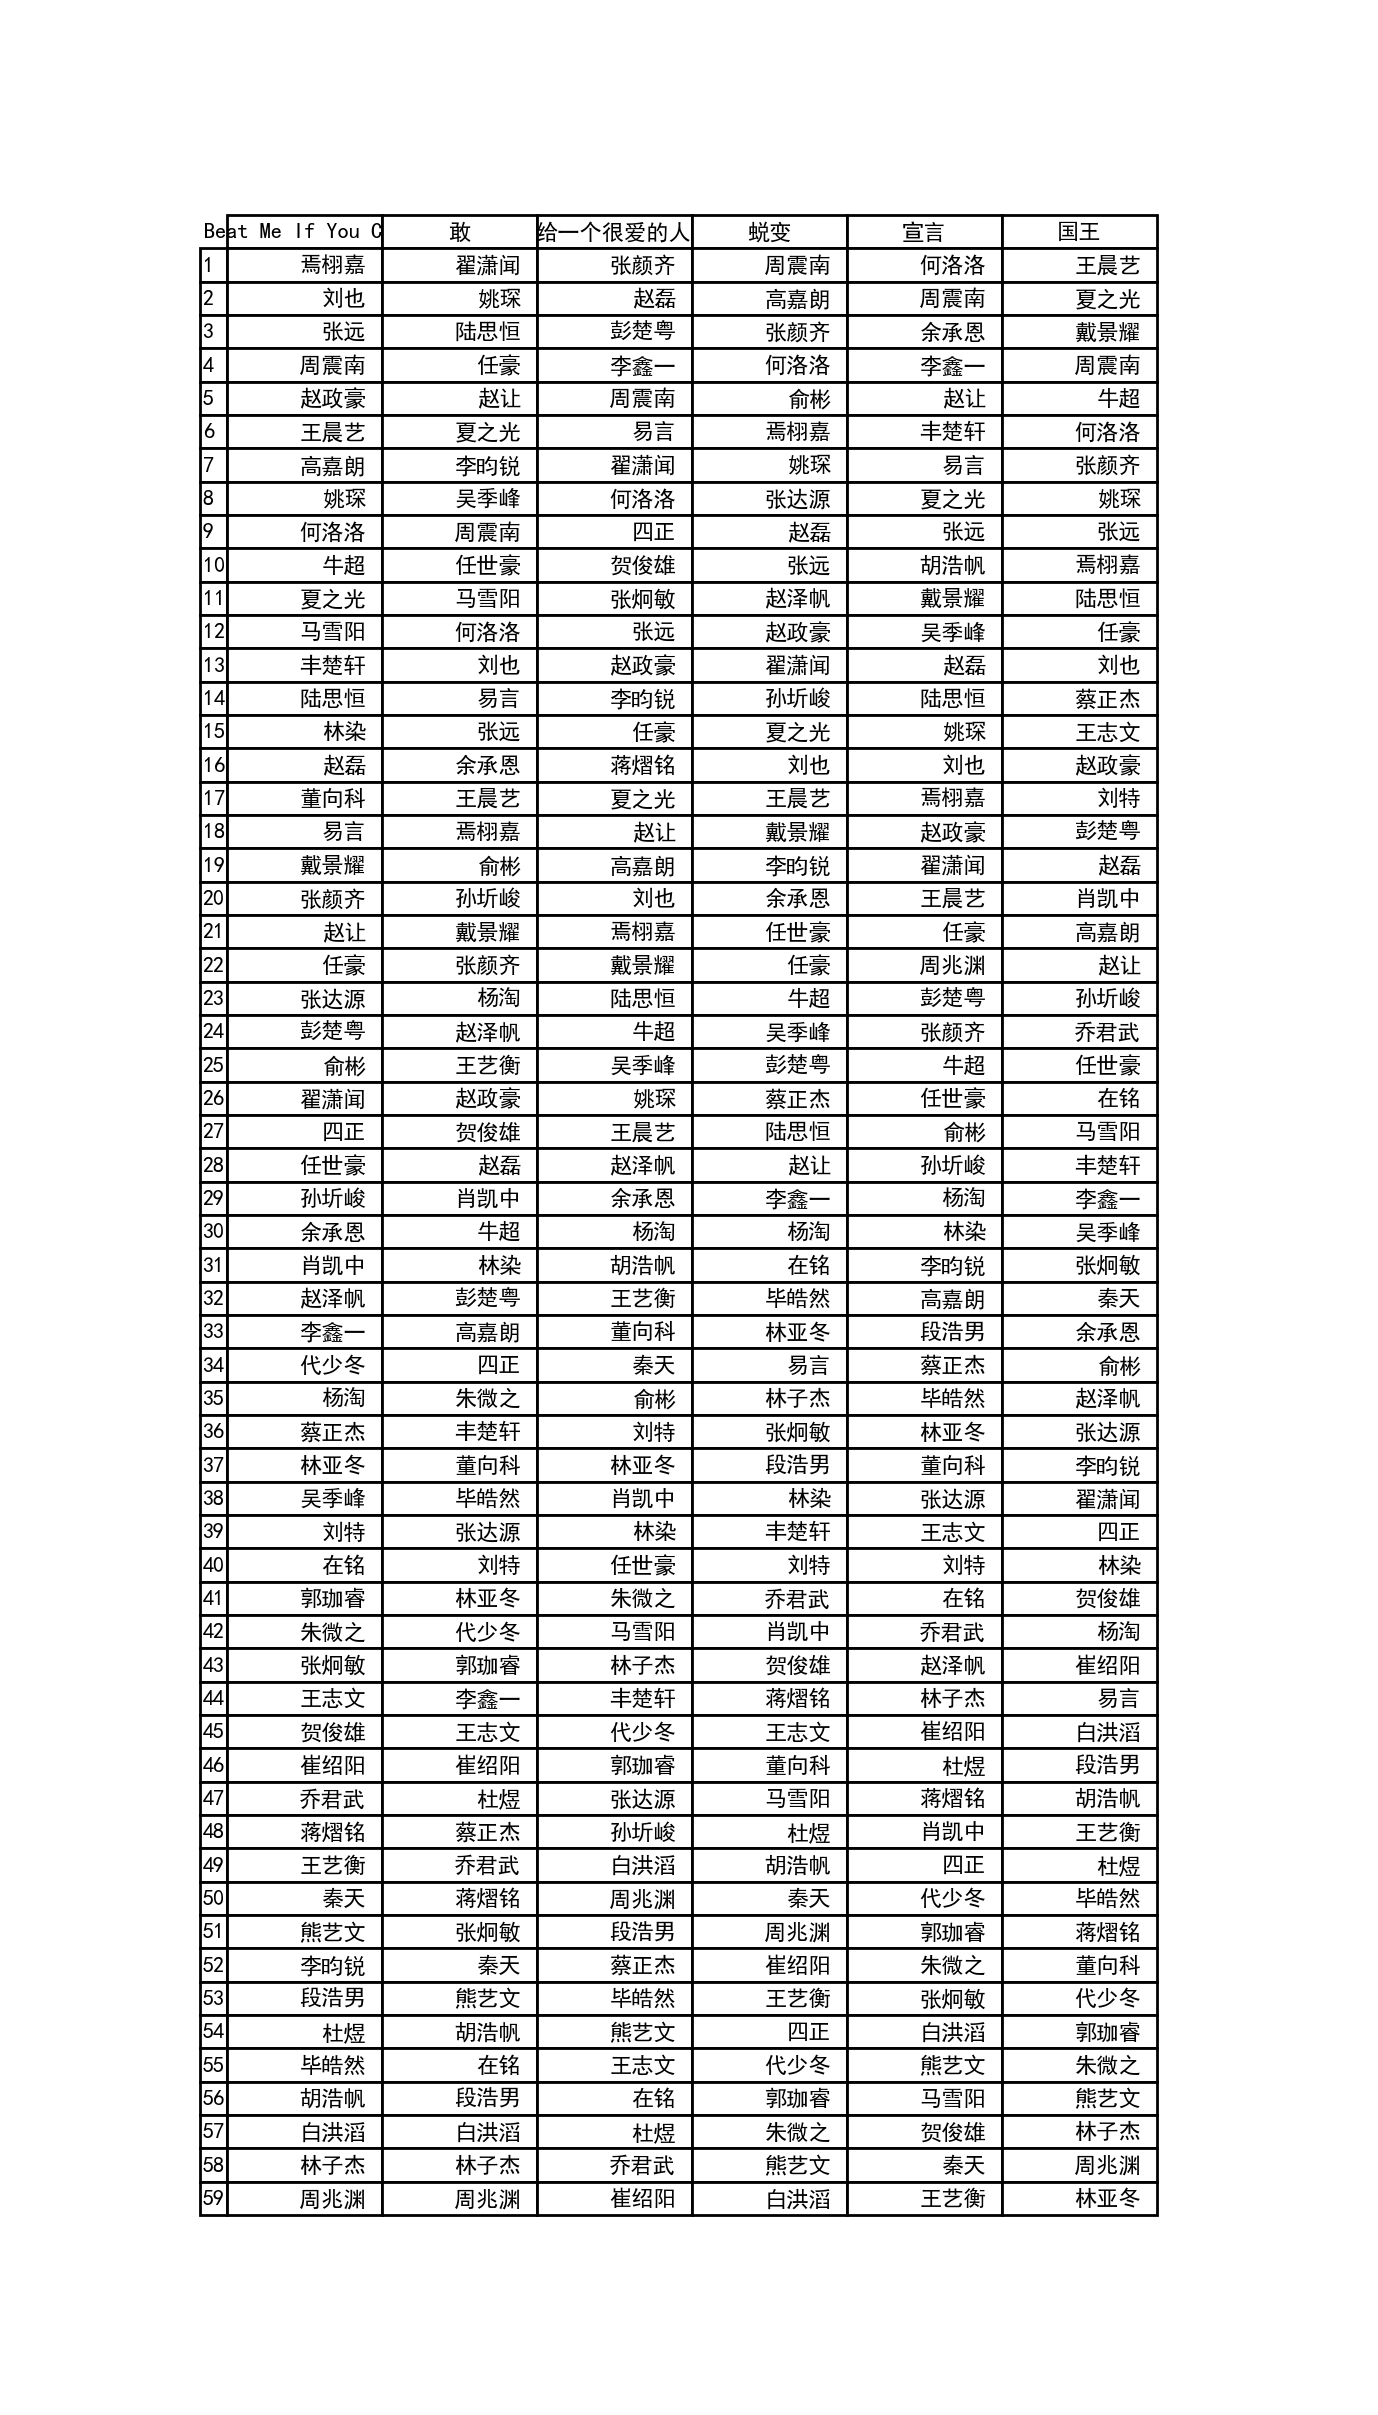

In [115]:
plot(pd.DataFrame(ivers_rankings),'song_rankings')

C:\MANUAL\APPLICATIONS\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1200x800 with 0 Axes>

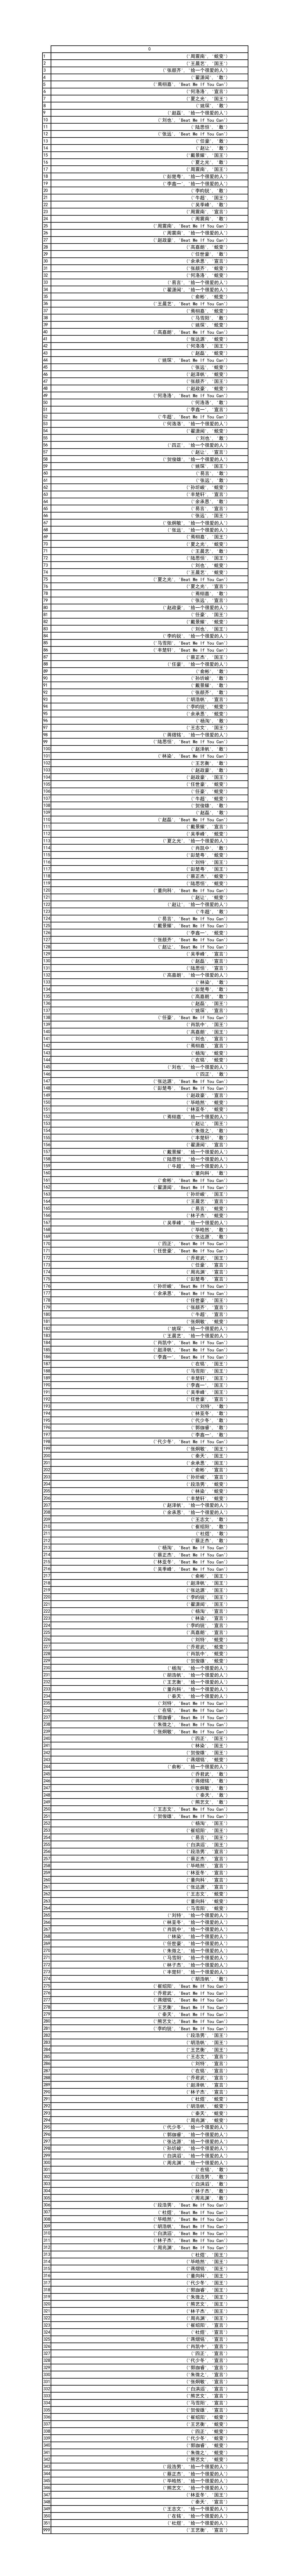

In [116]:
plot(pd.DataFrame(totals),'total rankings')